# *DataThon*

In [1]:
#Importamos las librerias que utiizaremos inicialmente.
# A medida que iremos avanzando importaremos mas librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## *Pasaremos a convertir los CSV a DataFrame para iniciar el procesamiento de los datos*

*Buscaremos valores null y caulquier otra impureza que tengan nuestros datos*

# *EDA (Analisis Exploratorio de Datos)*

In [2]:
df_train = pd.read_csv(r'C:\Users\DIEZ\Desktop\MySpace\Practicas\Datathon-main\hospitalizaciones_train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

In [3]:
df_train.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [4]:
df_test = pd.read_csv(r'C:\Users\DIEZ\Desktop\MySpace\Practicas\Datathon-main\hospitalizaciones_test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Available Extra Rooms in Hospital  90000 non-null  int64  
 1   Department                         90000 non-null  object 
 2   Ward_Facility_Code                 90000 non-null  object 
 3   doctor_name                        90000 non-null  object 
 4   staff_available                    90000 non-null  int64  
 5   patientid                          90000 non-null  int64  
 6   Age                                90000 non-null  object 
 7   gender                             90000 non-null  object 
 8   Type of Admission                  90000 non-null  object 
 9   Severity of Illness                90000 non-null  object 
 10  health_conditions                  90000 non-null  object 
 11  Visitors with Patient              90000 non-null  int

In [5]:
df_test.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit
0,3,gynecology,F,Dr Olivia,10,2858,21-30,Female,Trauma,Moderate,Other,2,No,4749.640225
1,2,TB & Chest disease,E,Dr John,4,65657,51-60,Female,Trauma,Moderate,Asthama,2,Yes,4122.261324
2,2,radiotherapy,E,Dr John,7,45598,51-60,Other,Trauma,Moderate,None,3,No,5459.067882
3,2,gynecology,F,Dr Olivia,1,31132,21-30,Female,Trauma,Moderate,None,2,Yes,3987.033318
4,2,anesthesia,A,Dr John,7,125021,51-60,Female,Trauma,Extreme,Diabetes,2,No,4770.789695


C:\Users\DIEZ\AppData\Local\Temp\ipykernel_12660\1828360409.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_train.corr()


<AxesSubplot: >

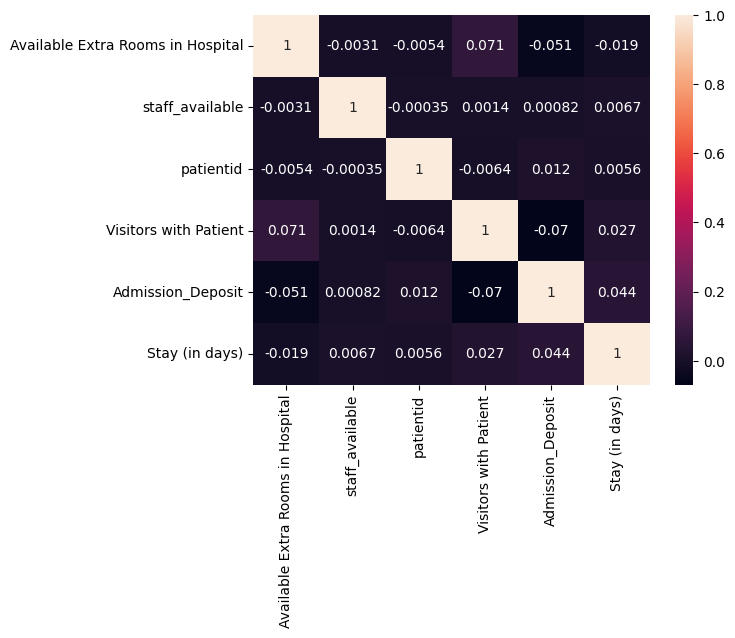

In [6]:
df_train.columns
corr = df_train.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True)

## *Columna Target (Objetivo)*

In [25]:
df_train['target']= np.where(df_train['Stay (in days)'] >= df_train['Stay (in days)'].mean(), 1, 0)
df_train['target'].value_counts()

0    314361
1     95639
Name: target, dtype: int64

In [26]:
X = df_train[['Available Extra Rooms in Hospital','staff_available','patientid','Visitors with Patient','Admission_Deposit']]
y = df_train['target']

In [27]:
test = df_test[['Available Extra Rooms in Hospital','staff_available','patientid','Visitors with Patient','Admission_Deposit']]

## *Entrenamiento*
*Usaremos K_vecinos en nuentro modelo, pero primero lo entrenaremos*

In [28]:
from sklearn.model_selection import train_test_split
X_train, y_train, x_test, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [29]:
from sklearn.preprocessing import StandardScaler
st_sc = StandardScaler()
X_train = st_sc.fit_transform(X_train)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X.values,y.values) # Entrenamos el modelo.

KNeighborsClassifier()

## *Predecimos*

In [31]:
y_pred = clf.predict(X.values)

In [32]:
y_pred.shape[0]

410000

In [33]:
test_pred = clf.predict(test.values)

In [34]:
test_pred.shape[0]

90000

In [35]:
test_pred = pd.DataFrame(test_pred)
test_pred.rename({0 : 'pred'}, axis  = 1, inplace = True)

In [38]:
test_pred.head()

,pred
0,0
1,0
2,0
3,0
4,0


In [39]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [44]:
def metricas_precision(valor1, valor2):
    """ Recibe como valores y e y_pred"""
    acurracy = accuracy_score(y,y_pred)
    recall = recall_score(y,y_pred)
    f1 = f1_score(y,y_pred)
    precision = precision_score(y,y_pred)
    return acurracy, recall, f1, precision

In [46]:
metricas_precision(X, test_pred)

(0.7902853658536585,
 0.24060268300588672,
 0.34863830915495625,
 0.6327613705109167)

## *Gráficamos la matriz de confusión*

In [47]:
from sklearn.metrics import confusion_matrix, classification_report

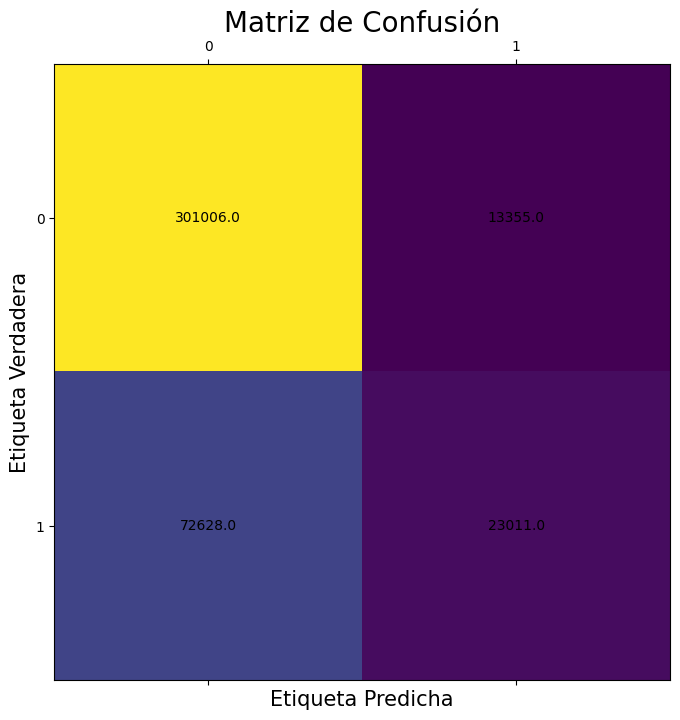

In [48]:
cm = confusion_matrix(y, y_pred)

fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

## *Convertimos en CSV nuestra predicción*

In [53]:
carga = r'C:\Users\DIEZ\Desktop\MySpace\Practicas\Datathon-main\Luismadrid77.csv'
test_pred.to_csv(carga, index = False)